<IPython.core.display.Javascript object>


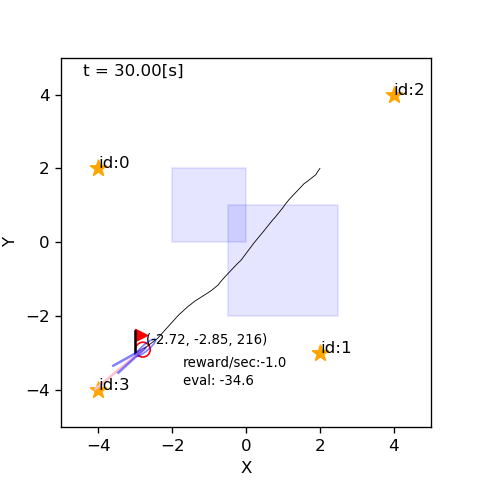

In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy
import math
import kal_python as kal

def trial():  ###puddle_world4_trial
    time_interval = 0.1
    world = kal.PuddleWorld(30, time_interval, debug=False) 

    ## 地図を生成して3つランドマークを追加 ##
    m = kal.Map()
    for ln in [(-4,2), (2,-3), (4,4), (-4,-4)]: m.append_landmark(kal.Landmark(*ln))
    world.append(m)   

    ##ゴールの追加##
    goal = kal.Goal(-3,-3)  #goalを変数に
    world.append(goal)
    
    ##水たまりの追加##
    world.append(kal.Puddle((-2, 0), (0, 2), 0.1)) 
    world.append(kal.Puddle((-0.5, -2), (2.5, 1), 0.1)) 

   ##ロボットを作る##
    initial_pose = np.array([2, 2,0]).T
    kf = kal.KalmanFilter(m, initial_pose) 
    a = kal.PuddleIgnoreAgent(time_interval, kf, goal) #goalを渡す
    r = kal.Robot(initial_pose, sensor=kal.Camera(m, distance_bias_rate_stddev=0, direction_bias_stddev=0), 
              agent=a, color="red", bias_rate_stds=(0,0))
    world.append(r)
    
    world.draw()
    
trial()
